# Waterwell Project

Purpose: The purpose of this project is to...

# Packages and Functions

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 500)

/Users/stevenkyle/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# EDA

## Initial look at data and upload

In [2]:
# Import "Training Data" Which is going to be are actual data set
X_data = pd.read_csv('TrainingSet.csv')
y_data = pd.read_csv('TrainingSetLabels.csv')

In [3]:
# Merge just to check it out
Full_data = pd.merge(X_data, y_data, left_on='id', right_on='id')

In [4]:
Full_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
Full_data.shape

(59400, 41)

In [6]:
#Checking for class inbalance
Full_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Don't really see much of class inbalance besides funcitonal/needs repair class

In [7]:
Full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

## Checking the Nan entries

In [8]:
print('These are the columns with nan values in the dataframe.')
Full_data.columns[Full_data.isna().any()].tolist()

These are the columns with nan values in the dataframe.


['funder',
 'installer',
 'subvillage',
 'public_meeting',
 'scheme_management',
 'scheme_name',
 'permit']

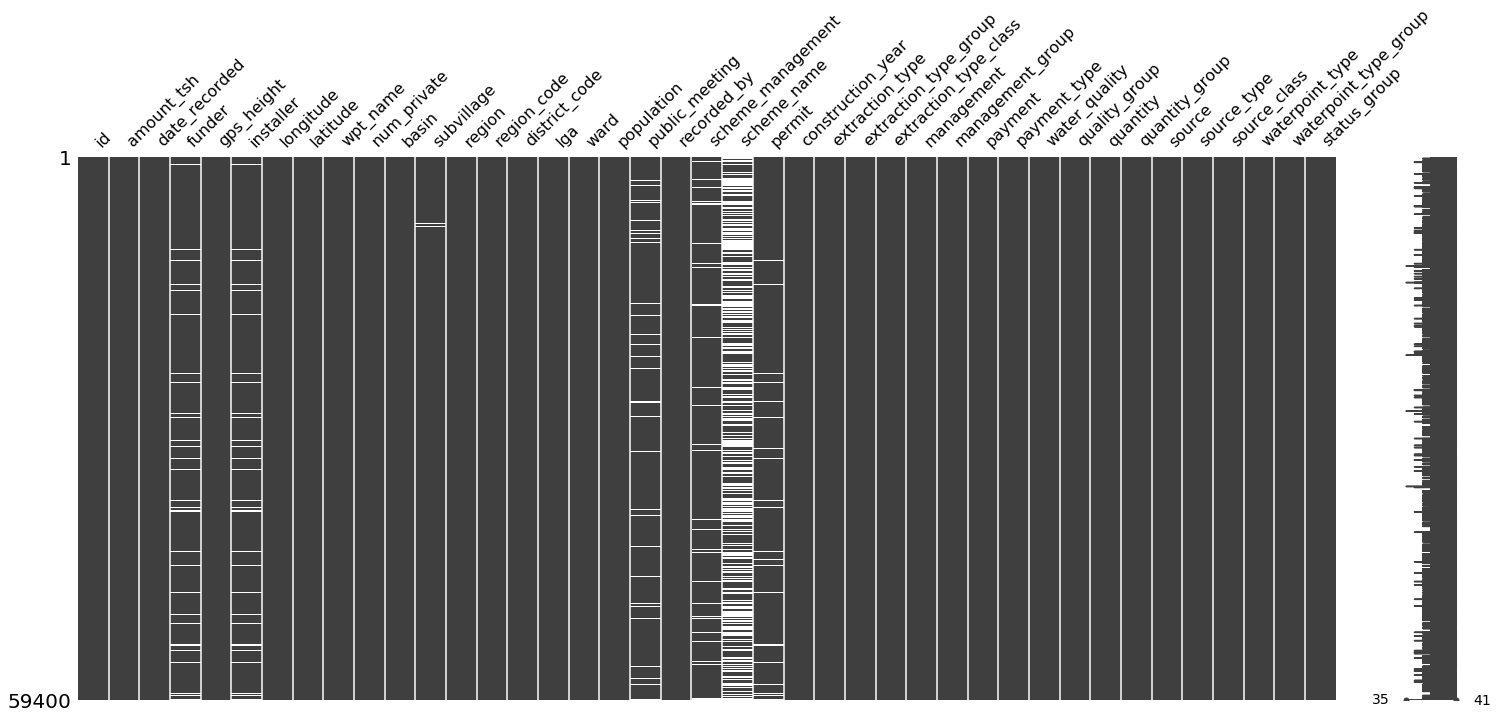

In [9]:
msno.matrix(Full_data)

In [10]:
# The missing data might be important so lets fill funder na using KNN imputation
Full_data.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Frankfurt                    1
Shelisheli Commission        1
Rwi                          1
Isf/gvt                      1
Simone                       1
Name: funder, Length: 1897, dtype: int64

In [11]:
# This missing data might be important too so lets fill installer na using KNN imputation
Full_data.installer.value_counts()

DWE              17402
Government        1825
RWE               1206
Commu             1060
DANIDA            1050
                 ...  
FinWate              1
Tareto               1
TLC/community        1
Robert Mosi          1
Adam mualuaka        1
Name: installer, Length: 2145, dtype: int64

In [12]:
# This missing data might be important too so lets fill subvillage na using KNN imputation
Full_data.subvillage.value_counts()

Madukani                 508
Shuleni                  506
Majengo                  502
Kati                     373
Mtakuja                  262
                        ... 
Biki                       1
Mwakibolo Shuleni          1
Luhimba Juu                1
Nyakafyeke                 1
Igalagalilo Mashariki      1
Name: subvillage, Length: 19287, dtype: int64

In [13]:
# This missing data might be important too so lets fill public_meeting na as Unknown (done in preprocessing section)
Full_data.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [14]:
# there is too much missing data on scheme_name and i believe scheme_management is giving same info
# Lets drop scheme_name
print(Full_data.scheme_name.isna().sum())
Full_data.scheme_name.value_counts()

28166


K                             682
None                          644
Borehole                      546
Chalinze wate                 405
M                             400
                             ... 
Mbawala chini water suplly      1
BL oleve water supply           1
Kwenangwa water supp            1
AMRSF                           1
Pongwe Water Supply             1
Name: scheme_name, Length: 2696, dtype: int64

In [15]:
# This missing data might be important too so lets fill scheme_management na using KNN imputation
Full_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [16]:
# Probably safe to say that if you don't know you have a permit, its a no
Full_data.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [17]:
# Filling nan values just to look through data easier

Full_data[['funder', 'installer', 'public_meeting']] = Full_data[['funder', 'installer',
                                                                               'public_meeting']].fillna(value='Unknown')

Full_data[['subvillage', 'scheme_management']] = Full_data[['subvillage',
                                                                         'scheme_management']].fillna(value='None')
Full_data[['permit']] = Full_data[['permit']].fillna(value='False')

## Checking amount_tsh

What does amount_tsh look like? It looks mostly filled with 0's and seems like there's no real trend between 0's and non 0's for the categories.

In [18]:
test = Full_data[Full_data['amount_tsh'] == 0]
test1 = Full_data[Full_data['amount_tsh'] > 0]
len(test)

41639

In [19]:
len(test1)

17761

In [20]:
len(Full_data)

59400

Text(0.5, 1.0, 'status_group relation to amount_tsh')

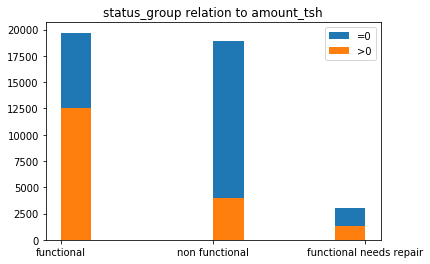

In [21]:
plt.hist(test['status_group'],label='=0')
plt.hist(test1['status_group'], label='>0')
plt.legend()
plt.title('status_group relation to amount_tsh')

Text(0.5, 1.0, 'status_group relation with increasing amount_tsh')

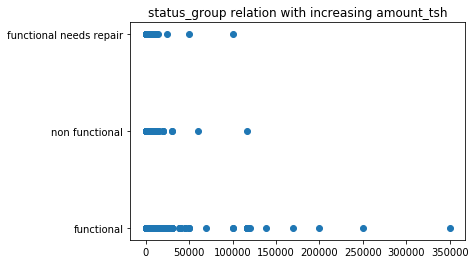

In [22]:
plt.scatter(y=test1['status_group'], x=test1['amount_tsh'])
plt.title('status_group relation with increasing amount_tsh')

## Looking at the extraction type columns

The three columns seem a little redundant. We'll keep the most detailed column and drop the other 2

In [23]:
comparison_column = np.where(Full_data["extraction_type_group"] == Full_data["extraction_type"], 0, 1)
comparison_column.sum()

2469

In [24]:
comparison_column2 = np.where(Full_data["extraction_type_group"] == Full_data["extraction_type_class"], 0, 1)
comparison_column2.sum()

19443

In [25]:
Full_data[Full_data['extraction_type'] != Full_data['extraction_type_group']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
31,6696,50.0,2011-03-16,Private Individual,180,WU,38.363555,-6.636104,Kituo Cha Maziwa,0,Wami / Ruvu,Kudipera,Pwani,6,1,Bagamoyo,Chalinze,150,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2004,ksb,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
45,12958,0.0,2012-10-22,World Vision,0,World Vision,33.345260,-3.838998,Shimasa,0,Internal,Isenegeja,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,WUG,SHIMASA,True,0,windmill,wind-powered,wind-powered,wug,user-group,pay when scheme fails,on failure,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional
66,34255,0.0,2011-02-22,Piusi,1788,SHIPO,34.897257,-9.203522,Kwa Piusi,0,Rufiji,Mahalule,Iringa,11,4,Njombe,Ikuka,50,True,GeoData Consultants Ltd,Private operator,NaN,True,2010,other - rope pump,rope pump,rope pump,private operator,commercial,never pay,never pay,soft,good,enough,enough,hand dtw,borehole,groundwater,hand pump,hand pump,functional
88,27312,50.0,2011-03-12,Private Individual,159,WU,38.353567,-6.638696,Kessy,0,Wami / Ruvu,Magwila,Pwani,6,1,Bagamoyo,Chalinze,20,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2008,ksb,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
92,39920,200.0,2011-03-23,Danida,18,DA,38.890402,-6.557903,Gedebu,0,Wami / Ruvu,Shule,Pwani,6,1,Bagamoyo,Kiromo,40,True,GeoData Consultants Ltd,Company,Bagamoyo wate,True,1987,ksb,submersible,submersible,vwc,user-group,pay monthly,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59293,45357,0.0,2013-12-02,Sangea District Council,847,Sangea District Coun,35.798121,-10.725160,Kwa Inglibeth,0,Ruvuma / Southern Coast,Nanyimbo B,Ruvuma,10,2,Songea Rural,Matimira,0,True,GeoData Consultants Ltd,VWC,NaN,True,2002,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
59309,50703,50.0,2013-01-22,Makonde,465,Makonde,39.423152,-10.873742,Mwinyi,0,Ruvuma / Southern Coast,Mwinyi,Mtwara,9,4,Tandahimba,Mahuta,860,True,GeoData Consultants Ltd,Water Board,Mahuta,True,1972,ksb,submersible,submersible,water board,user-group,pay per bucket,per bucket,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59325,52830,50.0,2011-03-16,Private Individual,182,WU,38.373661,-6.638756,Ballongo,0,Wami / Ruvu,Milalazi,Pwani,6,1,Bagamoyo,Chalinze,40,False,GeoData Consultants Ltd,WUA,Chalinze wate,True,2006,ksb,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59354,16666,0.0,2011-07-26,Md,0,DW,31.547474,-1.798378,Kwenye Chama Ch,0,Lake Victoria,Kishoju 1,Kagera,18,3,Muleba,Nshamba,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,ksb,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional


In [26]:
Full_data[Full_data['extraction_type_group'] != Full_data['extraction_type_class']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,None,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,None,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
11,50409,200.0,2013-02-18,Danida,1062,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,0,Lake Nyasa,Ngondombwito,Ruvuma,10,5,Namtumbo,Msindo,250,True,GeoData Consultants Ltd,WUG,NaN,False,1987,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59389,30410,0.0,2011-08-06,Co,783,DWE,30.646486,-7.365418,Sekondari,0,Lake Tanganyika,Itete B,Rukwa,15,3,Nkasi,Kirando,1500,False,GeoData Consultants Ltd,VWC,NaN,False,2009,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,Lake Tanganyika,Kitonto,Rukwa,15,2,Sumbawanga Rural,Mkowe,150,True,GeoData Consultants Ltd,VWC,NaN,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59397,37057,0.0,2011-04-11,Unknown,0,Unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [27]:
Full_data[Full_data['extraction_type'] != Full_data['extraction_type_class']]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,None,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,None,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
11,50409,200.0,2013-02-18,Danida,1062,DANIDA,35.770258,-10.574175,Kwa Alid Nchimbi,0,Lake Nyasa,Ngondombwito,Ruvuma,10,5,Namtumbo,Msindo,250,True,GeoData Consultants Ltd,WUG,NaN,False,1987,swn 80,swn 80,handpump,wug,user-group,pay when scheme fails,on failure,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59389,30410,0.0,2011-08-06,Co,783,DWE,30.646486,-7.365418,Sekondari,0,Lake Tanganyika,Itete B,Rukwa,15,3,Nkasi,Kirando,1500,False,GeoData Consultants Ltd,VWC,NaN,False,2009,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59390,13677,0.0,2011-08-04,Rudep,1715,DWE,31.370848,-8.258160,Kwa Mzee Atanas,0,Lake Tanganyika,Kitonto,Rukwa,15,2,Sumbawanga Rural,Mkowe,150,True,GeoData Consultants Ltd,VWC,NaN,False,1991,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59397,37057,0.0,2011-04-11,Unknown,0,Unknown,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [28]:
# dropping id column
Full_data.drop(columns=['id'], axis=1, inplace=True)

# dropping 2 out of the 3 extraction type columns, they seem redundant
Full_data.drop(columns=['extraction_type_class','extraction_type_group'], axis=1, inplace=True)


## Looking at funder

Grouping all funders that fund 10 or less wells as small_funder reduces the overall amount of different categories significantly

In [29]:
Full_data.funder.value_counts()

Government Of Tanzania    9084
Unknown                   3639
Danida                    3114
Hesawa                    2202
Rwssp                     1374
                          ... 
Frankfurt                    1
Shelisheli Commission        1
Rwi                          1
Isf/gvt                      1
Simone                       1
Name: funder, Length: 1897, dtype: int64

In [30]:
test3 = Full_data
test3.loc[test3['funder'].value_counts()[test3['funder']].values < 11, 'funder'] = "small_funder"
test3.funder.nunique()

393

In [31]:
Full_data.loc[Full_data['funder'].value_counts()[Full_data['funder']].values < 11, 'funder'] = "small_funder"

In [32]:
Full_data.funder.value_counts()

Government Of Tanzania            9084
Unknown                           3639
small_funder                      3147
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
0                                  777
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                      

## Looking at GPS height

Keeping GPS as is, the data looks good

In [33]:
Full_data.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [34]:
Full_data.gps_height.value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff3403adc88>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff3403bd358>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff3403ad6d8>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff3403bd9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff3403bdd30>,
 'means': []}

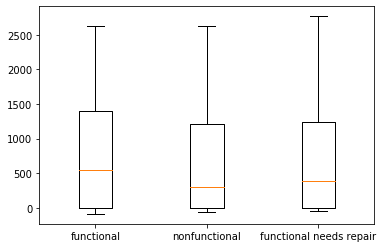

In [35]:
functional_group = Full_data[Full_data['status_group'] == 'functional']['gps_height']
nonfunctional_group = Full_data[Full_data['status_group'] == 'non functional']['gps_height']
functional_needs_repair_group = Full_data[Full_data['status_group'] == 'functional needs repair']['gps_height']
grouped = [functional_group,nonfunctional_group,functional_needs_repair_group]
plt.boxplot(grouped, labels=['functional','nonfunctional','functional needs repair'])

## Looking at Installer

Installer has 393 installers that have done 10 or less installs. Going to do KNN imputation to bring down number of columns for one hot encoding.

In [36]:
Full_data.installer.value_counts()

DWE              17402
Unknown           3658
Government        1825
RWE               1206
Commu             1060
                 ...  
FinWate              1
Tareto               1
TLC/community        1
Robert Mosi          1
Adam mualuaka        1
Name: installer, Length: 2145, dtype: int64

In [37]:
test4 = Full_data
test4.loc[test4['installer'].value_counts()[test4['installer']].values < 11, 'installer'] = "small_installer"
test4.funder.nunique()

393

## Looking at Longitude and Latitude

Lets do a scatter matrix with labels to see if we can make a psudo map

# Preprocessing

These are the "fixes" we're gonna do to the data

In [38]:
# Processing Nan values
df_preprocessed = pd.merge(X_data, y_data, left_on='id', right_on='id')

# Need to add na values to funders that fund 10 or less
df_preprocessed.loc[df_preprocessed['funder'].value_counts(
)[df_preprocessed['funder']].values < 11, 'funder'] = np.nan

# Need to add na values to installers that fund 10 or less
df_preprocessed.loc[df_preprocessed['installer'].value_counts(
)[df_preprocessed['installer']].values < 11, 'installer'] = np.nan

# df_preprocessed[['funder', 'installer', 'public_meeting']] = df_preprocessed[['funder', 'installer',
#                                                                              'public_meeting']].fillna(value='Unknown')

# df_preprocessed[['subvillage', 'scheme_management']] = df_preprocessed[['subvillage',
#                                                                        'scheme_management']].fillna(value='None')

df_preprocessed[['permit']] = df_preprocessed[['permit']].fillna(value='False')

# dropping id column and scheme_name
df_preprocessed.drop(columns=['id', 'scheme_name'], axis=1, inplace=True)

# dropping 2 out of the 3 extraction type columns, they seem redundant
df_preprocessed.drop(
    columns=['extraction_type_class', 'extraction_type_group'], axis=1, inplace=True)


# KNN imputation on all nan values for funder, subvillage public_meeting, scheme_management

# Let's keep

ValueError: Cannot mask with non-boolean array containing NA / NaN values

# Inital modeling

List of models to try:
- Logistic Regression
- KNN
- Bayesian Classification
- Decision Trees
- Random Forest
- XG Boost
- SVM

In [ ]:
Full_data.installer.value_counts()